In [1]:
# Dependencies
import matplotlib.pyplot as plt
import requests
import pandas as pd
import json

In [2]:
#Create the query URL
url = "http://api.openweathermap.org/data/2.5/weather?"
api_key = "e588ec51b891d2b887520da376e73f48"
units = "metric"

query_url = url + "appid=" + api_key + "&units=" + units + "&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=e588ec51b891d2b887520da376e73f48&units=metric&q=


In [3]:
#Set up the lists for the cities and parameters of interest.
cities = ["Paris", "London", "Oslo", "Beijing"]
latitude = []
temp_c = []

In [5]:
#Example city to look at the data structure
# response = requests.get(query_url + "Canberra").json()
# print(json.dumps(response, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -35.2835,
        "lon": 149.1281
    },
    "dt": 1679993000,
    "id": 2172517,
    "main": {
        "feels_like": 16.34,
        "humidity": 94,
        "pressure": 1013,
        "temp": 16.21,
        "temp_max": 18.16,
        "temp_min": 15.05
    },
    "name": "Canberra",
    "rain": {
        "1h": 0.35
    },
    "sys": {
        "country": "AU",
        "id": 2004200,
        "sunrise": 1679947937,
        "sunset": 1679990706,
        "type": 2
    },
    "timezone": 39600,
    "visibility": 10000,
    "weather": [
        {
            "description": "light intensity shower rain",
            "icon": "09n",
            "id": 520,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 20,
        "speed": 3.6
    }
}


In [7]:
#Loop through the cities and request data for each
for i in cities:
    response = requests.get(query_url + i).json()
    latitude.append(response["coord"]["lat"])
    temp_c.append(response["main"]["temp"])

In [8]:
#Print the resulting lists
print(f'Latitude information: {latitude}')
print(f'Temperature information: {temp_c}')

Latitude information: [48.8534, 51.5085, 59.9127, 39.9075]
Temperature information: [6.41, 7.68, -1.44, 18.94]


In [9]:
#Store the data in a dictionary
weather_data = {
    "City": cities,
    "Latitude": latitude,
    "Temperature_Celsius": temp_c
}

In [10]:
#Convert the dictionary into a dataframe
weather_df = pd.DataFrame(weather_data)
weather_df

,City,Latitude,Temperature_Celsius
0,Paris,48.8534,6.41
1,London,51.5085,7.68
2,Oslo,59.9127,-1.44
3,Beijing,39.9075,18.94


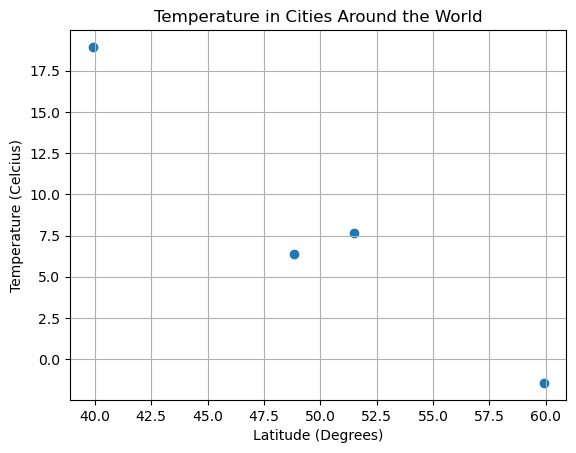

In [16]:
#Build a scatterplot for temperature vs. latitude
plt.scatter(weather_df["Latitude"], weather_df["Temperature_Celsius"])
plt.title("Temperature in Cities Around the World")
plt.xlabel("Latitude (Degrees)")
plt.ylabel("Temperature (Celcius)")
plt.grid(True)

#Save the figure & display
plt.savefig("TemperatureinCitiesAroundtheWorld.png")
plt.show()